## Chapter 4 - Representing Data and Engineering Features

So far, we’ve assumed that our data comes in as a two-dimensional array of floating- point numbers, where each column is a continuous feature that describes the data points. For many applications, this is not how the data is collected. A particularly common type of feature is the categorical features. Also known as discrete features, these are usually not numeric. The distinction between categorical features and con‐ tinuous features is analogous to the distinction between classification and regression, only on the input side rather than the output side. Examples of continuous features that we have seen are pixel brightnesses and size measurements of plant flowers. Examples of categorical features are the brand of a product, the color of a product, or the department (books, clothing, hardware) it is sold in. These are all properties that can describe a product, but they don’t vary in a continuous way. A product belongs either in the clothing department or in the books department. There is no middle ground between books and clothing, and no natural order for the different categories (books is not greater or less than clothing, hardware is not between books and cloth‐ ing, etc.).

Regardless of the types of features your data consists of, how you represent them can have an enormous effect on the performance of machine learning models. We saw in Chapters 2 and 3 that scaling of the data is important. In other words, if you don’t rescale your data (say, to unit variance), then it makes a difference whether you repre‐ sent a measurement in centimeters or inches. We also saw in Chapter 2 that it can be helpful to augment your data with additional features, like adding interactions (prod‐ ucts) of features or more general polynomials.

The question of how to represent your data best for a particular application is known as feature engineering, and it is one of the main tasks of data scientists and machine learning practitioners trying to solve real-world problems. Representing your data in the right way can have a bigger influence on the performance of a supervised model than the exact parameters you choose.

In this chapter, we will first go over the important and very common case of categori‐ cal features, and then give some examples of helpful transformations for specific combinations of features and models.


## Categorical Variables

As an example, we will use the dataset of adult incomes in the United States, derived from the 1994 census database. The task of the adult dataset is to predict whether a worker has an income of over \$50,000 or under \$50,000. The features in this dataset include the workers’ ages, how they are employed (self employed, private industry employee, government employee, etc.), their education, their gender, their working hours per week, occupation, and more. Table 4-1 shows the first few entries in the dataset.

![IRIS](resources/ch_4_1.png)

The task is phrased as a classification task with the two classes being income <=50k and >50k. It would also be possible to predict the exact income, and make this a regression task. However, that would be much more difficult, and the 50K division is interesting to understand on its own.


In this dataset, age and hours-per-week are continuous features, which we know how to treat. The workclass, education, sex, and occupation features are categori‐ cal, however. All of them come from a fixed list of possible values, as opposed to a range, and denote a qualitative property, as opposed to a quantity.

As a starting point, let’s say we want to learn a logistic regression classifier on this data. We know from Chapter 2 that a logistic regression makes predictions, ŷ, using the following formula:
ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0

where w[i] and b are coefficients learned from the training set and x[i] are the input features. This formula makes sense when x[i] are numbers, but not when x[2] is "Masters" or "Bachelors". Clearly we need to represent our data in some different way when applying logistic regression. The next section will explain how we can overcome this problem.

### One-Hot-Encoding (Dummy Variables)

By far the most common way to represent categorical variables is using the one-hot- encoding or one-out-of-N encoding, also known as dummy variables. The idea behind dummy variables is to replace a categorical variable with one or more new features that can have the values 0 and 1. The values 0 and 1 make sense in the formula for linear binary classification (and for all other models in scikit-learn), and we can represent any number of categories by introducing one new feature per category, as described here.


Let’s say for the workclass feature we have possible values of "Government Employee", "Private Employee", "Self Employed", and "Self Employed Incorpo rated". To encode these four possible values, we create four new features, called "Gov ernment Employee", "Private Employee", "Self Employed", and "Self Employed Incorporated". A feature is 1 if workclass for this person has the corresponding value and 0 otherwise, so exactly one of the four new features will be 1 for each data point. This is why this is called one-hot or one-out-of-N encoding.

The principle is illustrated in Table 4-2. A single feature is encoded using four new features. When using this data in a machine learning algorithm, we would drop the original workclass feature and only keep the 0–1 features.

![IRIS](resources/ch_4_2.png)

There are two ways to convert your data to a one-hot encoding of categorical vari‐ ables, using either pandas or scikit-learn. At the time of writing, using pandas is slightly easier, so let’s go this route. First we load the data using pandas from a comma-separated values (CSV) file:

In [ ]:
import pandas as pd
# The file has no headers naming the columns, so we pass header=None # and provide the column names explicitly in "names"
data = pd.read_csv(
        "/home/andy/datasets/adult.data", header=None, index_col=False,
        names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
               'marital-status', 'occupation', 'relationship', 'race', 'gender',
               'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
               'income'])

In [ ]:
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

In [ ]:
data.head()

![IRIS](resources/ch_4_3.png)

### Checking string-encoded categorical data

After reading a dataset like this, it is often good to first check if a column actually contains meaningful categorical data. When working with data that was input by humans (say, users on a website), there might not be a fixed set of categories, and dif‐ ferences in spelling and capitalization might require preprocessing. For example, it might be that some people specified gender as “male” and some as “man,” and we might want to represent these two inputs using the same category. A good way to check the contents of a column is using the value_counts function of a pandas Series (the type of a single column in a DataFrame), to show us what the unique val‐ ues are and how often they appear:


In [ ]:
print(data.gender.value_counts())

```
Male 21790
Female    10771
Name: gender, dtype: int64
```

We can see that there are exactly two values for gender in this dataset, Male and Female, meaning the data is already in a good format to be represented using one- hot-encoding. In a real application, you should look at all columns and check their values. We will skip this here for brevity’s sake.

There is a very simple way to encode the data in pandas, using the get_dummies func‐ tion. The get_dummies function automatically transforms all columns that have object type (like strings) or are categorical (which is a special pandas concept that we haven’t talked about yet):


In [ ]:
print("Original features:\n", list(data.columns), "\n") 
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

```
 Original features:
     ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation',
'income']
    Features after get_dummies:
     ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
      'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
      'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
      'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
      'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       ...
      'education_ Preschool', 'education_ Prof-school', 'education_ Some-college',
      'gender_ Female', 'gender_ Male', 'occupation_ ?',
      'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
      'occupation_ Craft-repair', 'occupation_ Exec-managerial',
      'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
      ...
      'occupation_ Tech-support', 'occupation_ Transport-moving',
      'income_ <=50K', 'income_ >50K']
```

You can see that the continuous features age and hours-per-week were not touched, while the categorical features were expanded into one new feature for each possible value:

data_dummies.head()

![IRIS](resources/ch_4_4.png)

We can now use the values attribute to convert the data_dummies DataFrame into a NumPy array, and then train a machine learning model on it. Be careful to separate the target variable (which is now encoded in two income columns) from the data before training a model. Including the output variable, or some derived property of the output variable, into the feature representation is a very common mistake in building supervised machine learning models.

**Be careful: column indexing in pandas includes the end of the range, so 'age':'occupation_ Transport-moving' is inclusive of occupation_ Transport-moving. This is different from slicing a NumPy array, where the end of a range is not included: for exam‐ ple, np.arange(11)[0:10] doesn’t include the entry with index 10.
**

In this case, we extract only the columns containing features—that is, all columns from age to occupation_ Transport-moving. This range contains all the features but not the target:


In [ ]:
features = data_dummies.ix[:, 'age':'occupation_ Transport-moving'] # Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

```
X.shape: (32561, 44) y.shape: (32561,)
```

Now the data is represented in a way that scikit-learn can work with, and we can
proceed as usual:


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))
#  Test score: 0.81

**
In this example, we called get_dummies on a DataFrame containing both the training and the test data. This is important to ensure cat‐ egorical values are represented in the same way in the training set and the test set.**

**Imagine we have the training and test sets in two different Data Frames. If the "Private Employee" value for the workclass feature does not appear in the test set, pandas will assume there are only three possible values for this feature and will create only three new dummy features. Now our training and test sets have different numbers of features, and we can’t apply the model we learned on the training set to the test set anymore. Even worse, imagine the workclass feature has the values "Government Employee" and "Private Employee" in the training set, and "Self Employed" and "Self Employed Incorporated" in the test set. In both cases, pandas will create two new dummy features, so the encoded Data Frames will have the same number of features. However, the two dummy features have entirely different meanings in the training and test sets. The column that means "Government Employee" for the training set would encode "Self Employed" for the test set.**

**If we built a machine learning model on this data it would work very badly, because it would assume the columns mean the same things (because they are in the same position) when in fact they mean very different things. To fix this, either call get_dummies on a DataFrame that contains both the training and the test data points, or make sure that the column names are the same for the training and test sets after calling get_dummies, to ensure they have the same semantics.
**

### Numbers Can Encode Categoricals

In the example of the adult dataset, the categorical variables were encoded as strings. On the one hand, that opens up the possibility of spelling errors, but on the other hand, it clearly marks a variable as categorical. Often, whether for ease of storage or because of the way the data is collected, categorical variables are encoded as integers. For example, imagine the census data in the adult dataset was collected using a ques‐ tionnaire, and the answers for workclass were recorded as 0 (first box ticked), 1 (sec‐ ond box ticked), 2 (third box ticked), and so on. Now the column will contain numbers from 0 to 8, instead of strings like "Private", and it won’t be immediately obvious to someone looking at the table representing the dataset whether they should treat this variable as continuous or categorical. Knowing that the numbers indicate employment status, however, it is clear that these are very distinct states and should not be modeled by a single continuous variable.

**Categorical features are often encoded using integers. That they are numbers doesn’t mean that they should necessarily be treated as continuous features. It is not always clear whether an integer fea‐ ture should be treated as continuous or discrete (and one-hot- encoded). If there is no ordering between the semantics that are encoded (like in the workclass example), the feature must be treated as discrete. For other cases, like five-star ratings, the better encoding depends on the particular task and data and which machine learning algorithm is used.**


The get_dummies function in pandas treats all numbers as continuous and will not create dummy variables for them. To get around this, you can either use scikit- learn’s OneHotEncoder, for which you can specify which variables are continuous and which are discrete, or convert numeric columns in the DataFrame to strings. To illustrate, let’s create a DataFrame object with two columns, one containing strings and one containing integers:

In [2]:
import pandas as pd

In [8]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({"Integer Feature": [0, 1, 2, 1],
                        "Categorical Feature": ["socks", "fox", "socks", "box"]})
demo_df

,Categorical Feature,Integer Feature
0,socks,0
1,fox,1
2,socks,2
3,box,1


Using get_dummies will only encode the string feature and will not change the integer feature.

In [9]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


If you want dummy variables to be created for the “Integer Feature” column, you can explicitly list the columns you want to encode using the columns parameter. Then, both features will be treated as categorical.

In [11]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## Binning, Discretization, Linear Models, and Trees

Skipped

## Interactions and Polynomials

Part one skipped.

Using binning is one way to expand a continuous feature. Another one is to use poly‐ nomials of the original features. For a given feature x, we might want to consider x ** 2, x ** 3, x ** 4, and so on. This is implemented in PolynomialFeatures in the preprocessing module:

In [32]:
import mglearn
import numpy as np

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

In [33]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [34]:
X_poly.shape

(100, 10)

Let’s compare the entries of X_poly to those of X:

In [35]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [36]:
X_poly[:5]

array([[ -7.52759287e-01,   5.66646544e-01,  -4.26548448e-01,
          3.21088306e-01,  -2.41702204e-01,   1.81943579e-01,
         -1.36959719e-01,   1.03097700e-01,  -7.76077513e-02,
          5.84199555e-02],
       [  2.70428584e+00,   7.31316190e+00,   1.97768801e+01,
          5.34823369e+01,   1.44631526e+02,   3.91124988e+02,
          1.05771377e+03,   2.86036036e+03,   7.73523202e+03,
          2.09182784e+04],
       [  1.39196365e+00,   1.93756281e+00,   2.69701700e+00,
          3.75414962e+00,   5.22563982e+00,   7.27390068e+00,
          1.01250053e+01,   1.40936394e+01,   1.96178338e+01,
          2.73073115e+01],
       [  5.91950905e-01,   3.50405874e-01,   2.07423074e-01,
          1.22784277e-01,   7.26822637e-02,   4.30243318e-02,
          2.54682921e-02,   1.50759786e-02,   8.92423917e-03,
          5.28271146e-03],
       [ -2.06388816e+00,   4.25963433e+00,  -8.79140884e+00,
          1.81444846e+01,  -3.74481869e+01,   7.72888694e+01,
         -1.59515582e+02

You can obtain the semantics of the features by calling the get_feature_names method, which provides the exponent for each feature:

In [37]:
poly.get_feature_names()

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

You can see that the first column of X_poly corresponds exactly to X, while the other columns are the powers of the first entry. It’s interesting to see how large some of the values can get. The second column has entries above 20,000, orders of magnitude dif‐ ferent from the rest.

Using polynomial features together with a linear regression model yields the classical model of polynomial regression (see Figure 4-5):

In [62]:
import matplotlib.pyplot as plt

%matplotlib inline

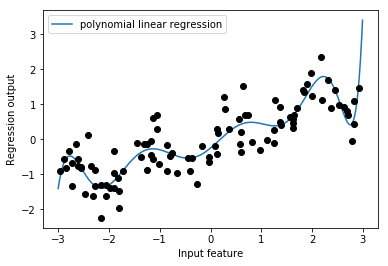

In [40]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


As you can see, polynomial features yield a very smooth fit on this one-dimensional data. However, polynomials of high degree tend to behave in extreme ways on the boundaries or in regions with little data.

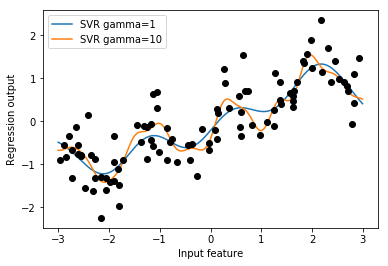

In [42]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Using a more complex model, a kernel SVM, we are able to learn a similarly complex prediction to the polynomial regression without an explicit transformation of the features.

As a more realistic application of interactions and polynomials, let’s look again at the Boston Housing dataset. We already used polynomial features on this dataset in Chapter 2. Now let’s have a look at how these features were constructed, and at how much the polynomial features help. First we load the data, and rescale it to be between 0 and 1 using MinMaxScaler:


In [45]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston["data"], boston["target"], random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now, we extract polynomial features and interactions up to a degree of 2:


In [47]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [48]:
X_train.shape

(379, 13)

In [49]:
X_train_poly.shape

(379, 105)

The data originally had 13 features, which were expanded into 105 interaction fea‐ tures. These new features represent all possible interactions between two different original features, as well as the square of each original feature. degree=2 here means that we look at all features that are the product of up to two original features. The exact correspondence between input and output features can be found using the get_feature_names method:

In [50]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x5^2',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x6^2',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x7^2',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x8^2',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x9^2',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x10^2',
 'x10 x11',
 'x10 x1

The first new feature is a constant feature, called "1" here. The next 13 features are the original features (called "x0" to "x12"). Then follows the first feature squared ("x0^2") and combinations of the first and the other features.

Let’s compare the performance using Ridge on the data with and without interac‐ tions:

In [52]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train) 
print("Score without interactions: {:.3f}".format(
ridge.score(X_test_scaled, y_test)))


Score without interactions: 0.621


In [54]:
ridge = Ridge().fit(X_train_poly, y_train) 
print("Score with interactions: {:.3f}".format(
ridge.score(X_test_poly, y_test)))

Score with interactions: 0.753


Clearly, the interactions and polynomial features gave us a good boost in perfor‐ mance when using Ridge. When using a more complex model like a random forest, the story is a bit different, though:

In [56]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train) 
print("Score without interactions: {:.3f}".format(
rf.score(X_test_scaled, y_test)))


Score without interactions: 0.800


In [58]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train) 
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score with interactions: 0.779


You can see that even without additional features, the random forest beats the performance of Ridge. Adding interactions and polynomials actually decreases per‐ formance slightly.

## Univariate Nonlinear Transformations

We just saw that adding squared or cubed features can help linear models for regres‐ sion. There are other transformations that often prove useful for transforming certain features: in particular, applying mathematical functions like log, exp, or sin. While tree-based models only care about the ordering of the features, linear models and neural networks are very tied to the scale and distribution of each feature, and if there is a nonlinear relation between the feature and the target, that becomes hard to model —particularly in regression. The functions log and exp can help by adjusting the rel‐ ative scales in the data so that they can be captured better by a linear model or neural network. 

Most models work best when each feature (and in regression also the target) is loosely Gaussian distributed—that is, a histogram of each feature should have something resembling the familiar “bell curve” shape. Using transformations like log and exp is a hacky but simple and efficient way to achieve this. A particularly common case when such a transformation can be helpful is when dealing with integer count data. By count data, we mean features like “how often did user A log in?” Counts are never negative, and often follow particular statistical patterns. We are using a synthetic dataset of counts here that has properties similar to those you can find in the wild. The features are all integer-valued, while the response is continuous:

In [70]:
import numpy as np

np.random.seed(0)
X_org = np.random.normal(size=(1000, 3))
w = np.random.normal(size=3)

X = np.random.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Let’s look at the first 10 entries of the first feature. All are integer values and positive, but apart from that it’s hard to make out a particular pattern.

If we count the appearance of each value, the distribution of values becomes clearer:

In [67]:
np.bincount(X[:, 0])

array([28, 38, 68, 48, 61, 59, 45, 56, 37, 40, 35, 34, 36, 26, 23, 26, 27,
       21, 23, 23, 18, 21, 10,  9, 17,  9,  7, 14, 12,  7,  3,  8,  4,  5,
        5,  3,  4,  2,  4,  1,  1,  3,  2,  5,  3,  8,  2,  5,  2,  1,  2,
        3,  3,  2,  2,  3,  3,  0,  1,  2,  1,  0,  0,  3,  1,  0,  0,  0,
        1,  3,  0,  1,  0,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  2,
        2,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1])

The value 2 seems to be the most common, with 62 appearances (bincount always starts at 0), and the counts for higher values fall quickly. However, there are some very high values, like 134 appearing twice.

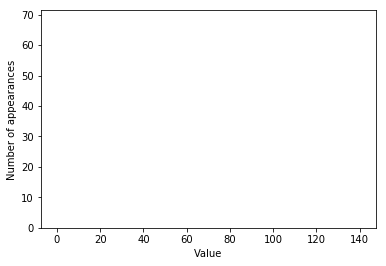

In [76]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='w')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

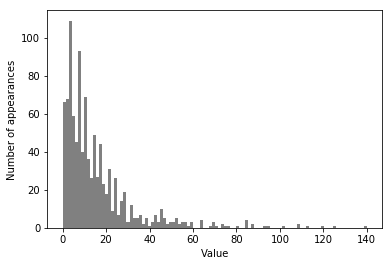

In [86]:
plt.hist(X[:, 0], bins=100, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

![IRIS](resources/ch_4_5.png)

Features X[:, 1] and X[:, 2] have similar properties. This kind of distribution of values (many small ones and a few very large ones) is very common in practice.1 However, it is something most linear models can’t handle very well. Let’s try to fit a ridge regression to this model:

In [78]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


As you can see from the relatively low R2 score, Ridge was not able to really capture the relationship between X and y. Applying a logarithmic transformation can help, though. Because the value 0 appears in the data (and the logarithm is not defined at 0), we can’t actually just apply log, but we have to compute log(X + 1):

In [79]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

After the transformation, the distribution of the data is less asymmetrical and doesn’t have very large outliers anymore (see Figure 4-8):

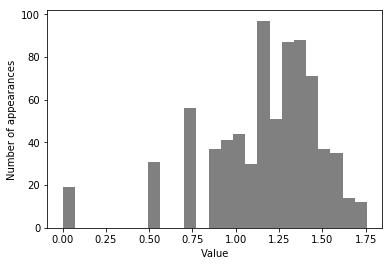

In [81]:
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [85]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test) 
print("Test score: {:.3f}".format(score))

Test score: 0.875


Finding the transformation that works best for each combination of dataset and model is somewhat of an art. In this example, all the features had the same properties. This is rarely the case in practice, and usually only a subset of the features should be transformed, or sometimes each feature needs to be transformed in a different way. As we mentioned earlier, these kinds of transformations are irrelevant for tree-based models but might be essential for linear models. Sometimes it is also a good idea to transform the target variable y in regression. Trying to predict counts (say, number of orders) is a fairly common task, and using the log(y + 1) transformation often helps. This is a very crude approximation of using Poisson regression, which would be the proper solution from a probabilistic standpoint.

As you saw in the previous examples, binning, polynomials, and interactions can have a huge influence on how models perform on a given dataset. This is particularly true for less complex models like linear models and naive Bayes models. Tree-based models, on the other hand, are often able to discover important interactions them‐ selves, and don’t require transforming the data explicitly most of the time. Other models, like SVMs, nearest neighbors, and neural networks, might sometimes benefit from using binning, interactions, or polynomials, but the implications there are usu‐ ally much less clear than in the case of linear models.

## Automatic Feature Selection

Skipped